In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
#on peut faire correlation map pour expliquer pq on enlève les stars

In [30]:
df = pd.read_csv('app_reviews.csv',delimiter=';')
print("shape = ", df.shape)
print(df.columns)

shape =  (132, 5)
Index(['title', 'rating', 'snippet', 'likes', 'date'], dtype='object')


In [31]:
ratings_summary = df['rating'].value_counts().sort_index()
summary_df = pd.DataFrame({
    'Rating': ratings_summary.index,
    'Number_of_People': ratings_summary.values
})
print(summary_df)


   Rating  Number_of_People
0     1.0                70
1     2.0                14
2     3.0                 7
3     4.0                 8
4     5.0                33


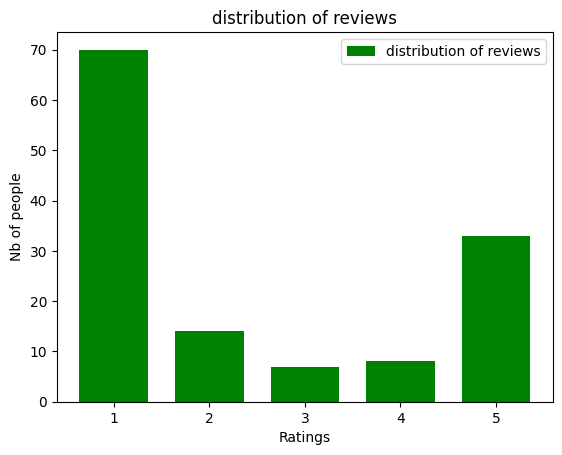

In [32]:
x = summary_df['Rating']
y = summary_df['Number_of_People']
plt.bar(x, y, color = 'g', width = 0.72, label = "distribution of reviews") 
plt.xlabel('Ratings') 
plt.ylabel('Nb of people') 
plt.title('distribution of reviews') 
plt.legend() 
plt.show() 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    132 non-null    object 
 1   rating   132 non-null    float64
 2   snippet  130 non-null    object 
 3   likes    132 non-null    int64  
 4   date     132 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.3+ KB


In [34]:
df.isnull().sum()

title      0
rating     0
snippet    2
likes      0
date       0
dtype: int64

In [35]:
print(df.shape)
# print(df)
df_cleaned = df.dropna(axis=0)
print(df_cleaned.shape)

(132, 5)
(130, 5)


In [36]:
df_cleaned['rating'].describe()
df = df_cleaned

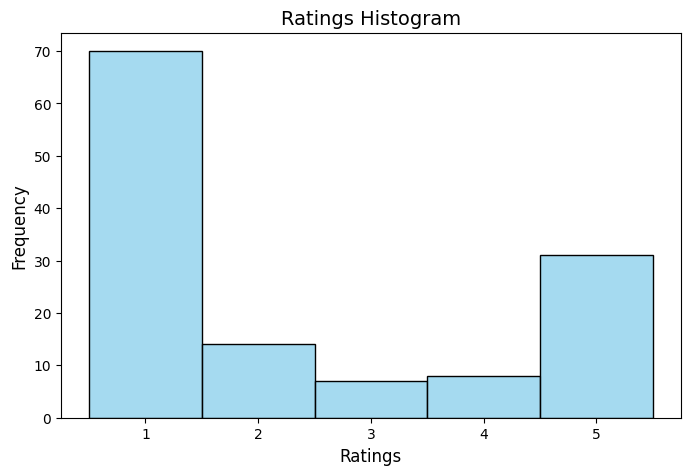

In [37]:
rating_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], kde=False, color="skyblue", discrete=True)
plt.title("Ratings Histogram", fontsize=14)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [38]:
#bias in feedback: people usually leave reviews when they are dissatisfied
#Poor Performance on Positive Reviews: The model may struggle to correctly 
#classify or predict the minority class (positive reviews) due to insufficient
#  representation.

In [39]:
# Word/Character Count:
df['word_count'] = df['snippet'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['snippet'].apply(lambda x: len(str(x)))
print(df[['word_count', 'char_count']].describe())


       word_count  char_count
count  130.000000  130.000000
mean    17.253846   91.915385
std     21.132770  111.116535
min      0.000000    1.000000
25%      4.000000   21.250000
50%      9.000000   48.000000
75%     24.500000  123.500000
max     98.000000  499.000000


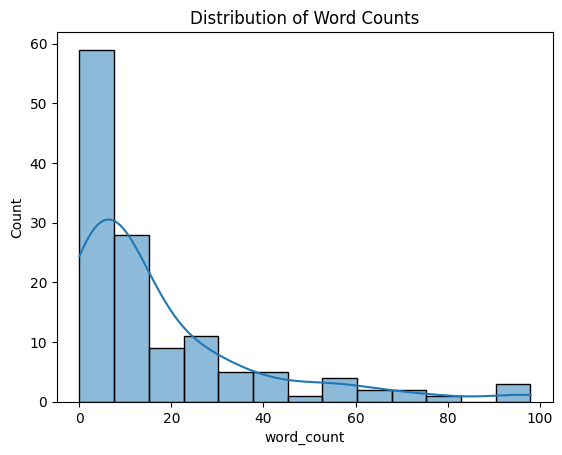

In [40]:
sns.histplot(df['word_count'], kde=True)
plt.title("Distribution of Word Counts")
plt.show()